# Reti neurali artificiali
## Percettrone Multistrato (MLP)
Le **reti neurali artificiali** sono un modello del machine learning estremamente potente quanto complesso, che funzionano replicando il funzionamento del cervello.
<img src="res/ann.png" width="300px" />
Il **percettrone multistrato** è un'architettura di rete neurale cositutia da una rete di **neuroni (chiamati anche nodi)** distribuiti su più **layers**:

 * Un layer di input: in cui il numero di neuroni corrisponde al numero di proprietà del nostro dataset.
 * Un layer di output: in cui il numero di neuroni corrisponde al numero di classi.
 * Uno o più **hidden layers**: livelli intermedi che utilizzano l'output del layer precendente per apprendere nuove proprietà.
   * Una rete neurale con un solo hidden layer è anche definita vanilla neural network.
   * Una rete neurale con due o più hidden layers è anche definita deep neural network (rete neurale profonda)
  
Ogni neurone di un hidden layer corrisponde ad un percettrone e l'attivazione di ognuno di essi è data da una funzione di attivazione non lineare.
<br><br>
Per essere addestrata correttamente una rete neurale richiede un numero elevato di esempi per l'addestramento, per questo utilizzeremo il MNIST dataset, un dataset di immagini di cifre scritte a mano contenente 60.000 esempi per l'addestramento e 10.000 per il test.
<br><br>
Importiamo le librerie necessarie.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

E' possibile scaricare il dataset da [questo sito](http://yann.lecun.com/exdb/mnist/), devi scaricare i seguenti 4 files:
 * train-images-idx3-ubyte.gz
 * train-labels-idx1-ubyte.gz
 * t10k-images-idx3-ubyte.gz
 * t10k-labels-idx1-ubyte.gz
 
poi decomprimili e inseriscili all'interno di una cartella "MNIST", **senza rinominarli**.<br>
I files con le proprietà contengono immagini in formato binario, quindi ho scritto una funzione che ti permette di ottenere direttamente gli array di train e test da questi files (la puoi trovare all'interno del file mnist.py)

In [2]:
from scripts.mnist import load_mnist

X_train, X_test, Y_train, Y_test = load_mnist(path="data/MNIST")
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))

Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


Le immagini hanno una dimensione di 28x28 pixels, quindi un esempio ha 784 proprietà.<br>
Eseguiamo la normalizzazione di train set e test set.

In [3]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Regressione logistica
Proviamo ad utilizzare una regressione logistica per classificare gli esempi del MNIST.
<br>
(Potrebbe richiedere diversi minuti)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=.1, max_iter=300)
lr.fit(X_train,Y_train)

y_pred_train = lr.predict(X_train)
y_prob_train = lr.predict_proba(X_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: TRAIN=0.9322 TEST=0.9258
LOG LOSS: TRAIN=0.2462 TEST=0.2638


## Percettrone multistrato

### Vanilla Neural Network
Adesso creiamo un percettrone multistrato con un unico hidden layer contenente 100 neuroni.<br>
Utilizziamo la classe MLPClassifier di scikit-learn, questa classe ha un numero di parametri da far girare la testa, cosa normale per una rete neurale, noi utilizziamo soltanto il parametro hidden_layer_sizes, all'interno del quale possiamo specificare il numero di hidden layers e di nodi per ognuno di essi.<br>
Settiamo il parametro verbose a True per visualizzare l'addestramento in maniera dinamica.
(Potrebbe richiedere diversi minuti)

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), verbose=True)
mlp.fit(X_train, Y_train)
    
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)
    
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)
    
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Iteration 1, loss = 0.43750383
Iteration 2, loss = 0.20241779
Iteration 3, loss = 0.15038195
Iteration 4, loss = 0.11989786
Iteration 5, loss = 0.09936365
Iteration 6, loss = 0.08394175
Iteration 7, loss = 0.07334982
Iteration 8, loss = 0.06298709
Iteration 9, loss = 0.05576664
Iteration 10, loss = 0.04930693
Iteration 11, loss = 0.04356868
Iteration 12, loss = 0.03917044
Iteration 13, loss = 0.03447228
Iteration 14, loss = 0.03105842
Iteration 15, loss = 0.02770420
Iteration 16, loss = 0.02509475
Iteration 17, loss = 0.02215218
Iteration 18, loss = 0.01958305
Iteration 19, loss = 0.01741741
Iteration 20, loss = 0.01638078
Iteration 21, loss = 0.01384324
Iteration 22, loss = 0.01268021
Iteration 23, loss = 0.01208147
Iteration 24, loss = 0.01100304
Iteration 25, loss = 0.00870775
Iteration 26, loss = 0.00801041
Iteration 27, loss = 0.00776194
Iteration 28, loss = 0.00651881
Iteration 29, loss = 0.00573142
Iteration 30, loss = 0.00525264
Iteration 31, loss = 0.00453157
Iteration 32, los

Il percettrone multistrato ci ha fornito dei risultati pazzeschi con un unico hidden layer.

### Deep Neural Network
Addesso proviamo a complicare un pò la nostra rete, aumentando il numero di nodi ed aggiungendo un ulteriore hidden layers.<br>
(può richiedere anche più di qualche minuto, vai a farti un caffè)

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512,512,), verbose=True)
mlp.fit(X_train, Y_train)
    
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)
    
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)
    
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Iteration 1, loss = 0.24057247
Iteration 2, loss = 0.08599954
Iteration 3, loss = 0.05281105
Iteration 4, loss = 0.03612952
Iteration 5, loss = 0.02573249
Iteration 6, loss = 0.02086384
Iteration 7, loss = 0.01451113
Iteration 8, loss = 0.01714327
Iteration 9, loss = 0.01339566
Iteration 10, loss = 0.01623046
Iteration 11, loss = 0.01238269
Iteration 12, loss = 0.00851719
Iteration 13, loss = 0.01259574
Iteration 14, loss = 0.00968040
Iteration 15, loss = 0.00529104
Iteration 16, loss = 0.00693928
Iteration 17, loss = 0.01131045
Iteration 18, loss = 0.01098637
Iteration 19, loss = 0.00634849
Iteration 20, loss = 0.00395953
Iteration 21, loss = 0.00623933
Iteration 22, loss = 0.00967941
Iteration 23, loss = 0.00715649
Iteration 24, loss = 0.01028864
Iteration 25, loss = 0.00607965
Iteration 26, loss = 0.00505660
Iteration 27, loss = 0.00362869
Iteration 28, loss = 0.00538500
Iteration 29, loss = 0.00892140
Iteration 30, loss = 0.00678019
Iteration 31, loss = 0.00378058
Iteration 32, los

La nostra rete neurale profonda ci ha fornito dei risultati ancora migliori !
Visualizziamo gli esempi del test set che ha sbagliato a classificare

Numero 5 classificato come 6


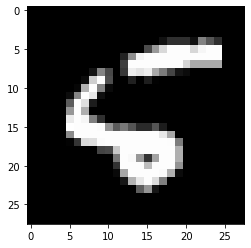

Numero 2 classificato come 9


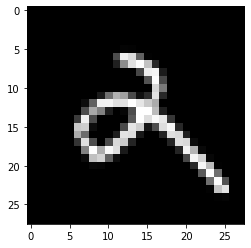

Numero 6 classificato come 5


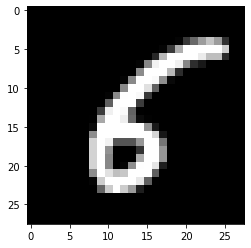

Numero 4 classificato come 2


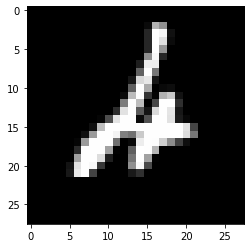

Numero 9 classificato come 4


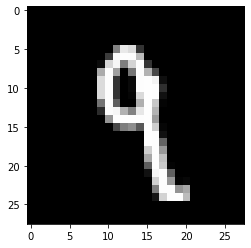

Numero 2 classificato come 7


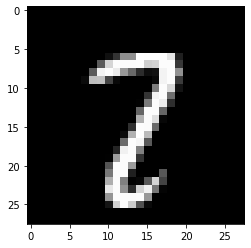

Numero 5 classificato come 3


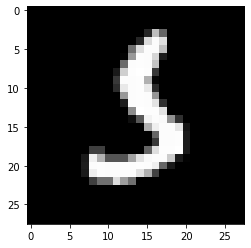

Numero 6 classificato come 0


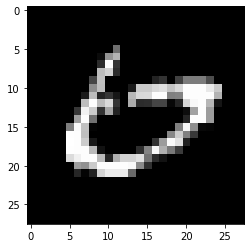

Numero 3 classificato come 5


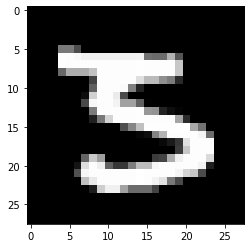

Numero 8 classificato come 0


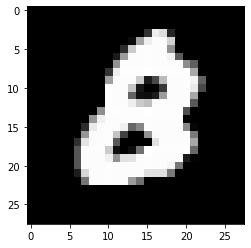

Numero 8 classificato come 2


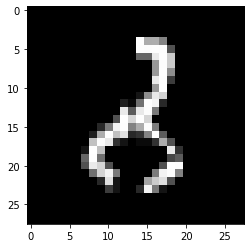

Numero 2 classificato come 1


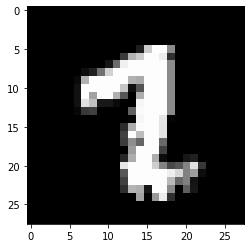

Numero 5 classificato come 3


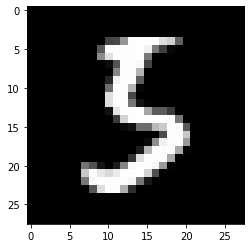

Numero 7 classificato come 2


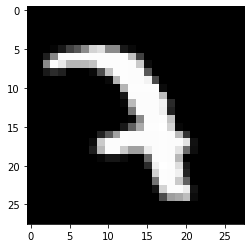

Numero 8 classificato come 4


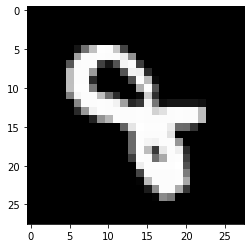

Numero 5 classificato come 8


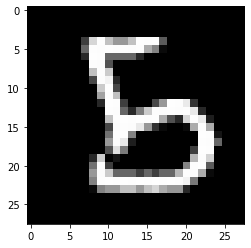

Numero 7 classificato come 2


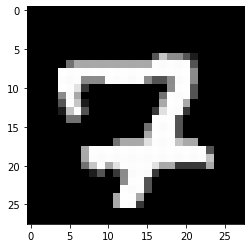

Numero 7 classificato come 9


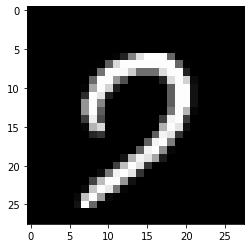

Numero 3 classificato come 5


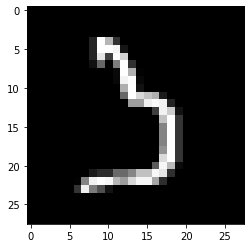

Numero 8 classificato come 9


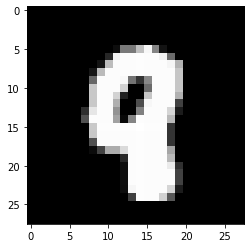

Numero 5 classificato come 4


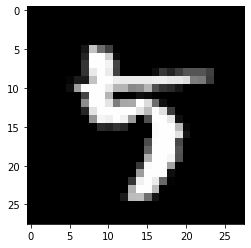

Numero 1 classificato come 2


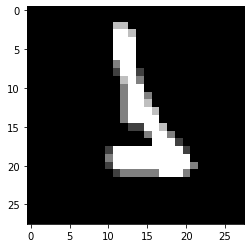

Numero 6 classificato come 5


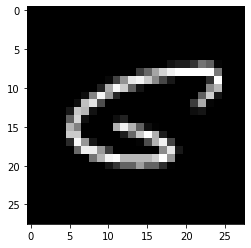

Numero 7 classificato come 1


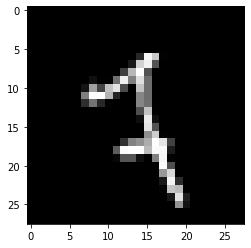

Numero 4 classificato come 6


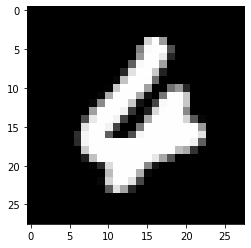

Numero 7 classificato come 8


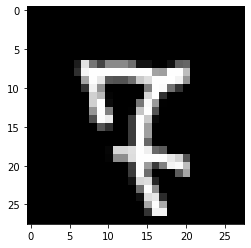

Numero 6 classificato come 5


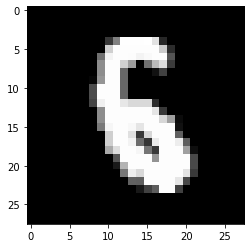

Numero 7 classificato come 9


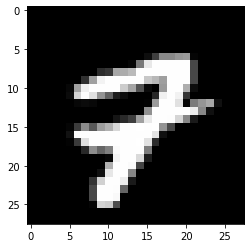

Numero 7 classificato come 2


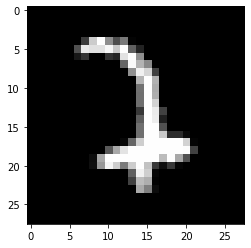

Numero 9 classificato come 0


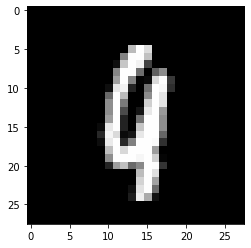

Numero 9 classificato come 5


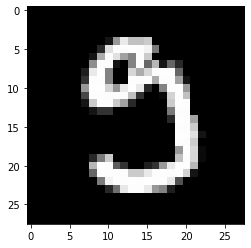

Numero 7 classificato come 1


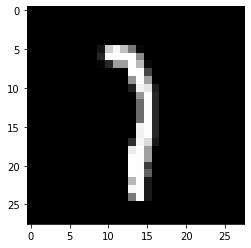

Numero 8 classificato come 3


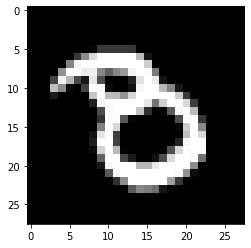

Numero 7 classificato come 1


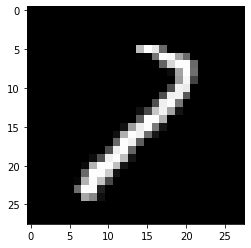

Numero 7 classificato come 9


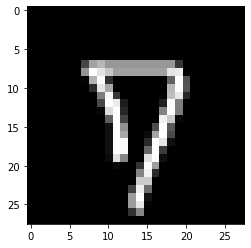

Numero 5 classificato come 3


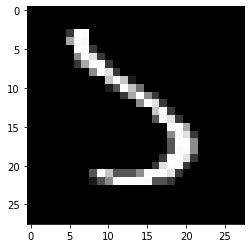

Numero 2 classificato come 8


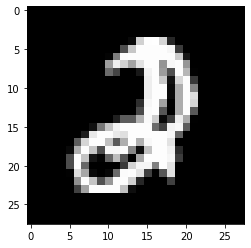

Numero 7 classificato come 9


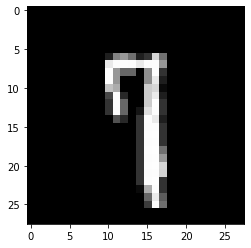

Numero 8 classificato come 7


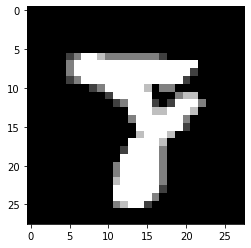

Numero 4 classificato come 6


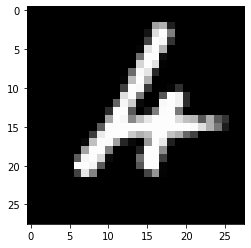

Numero 9 classificato come 3


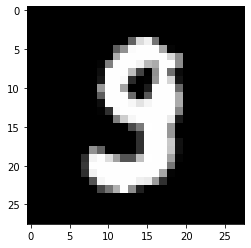

Numero 2 classificato come 6


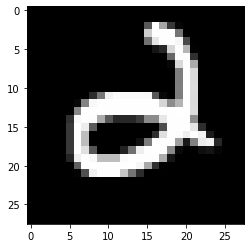

Numero 2 classificato come 8


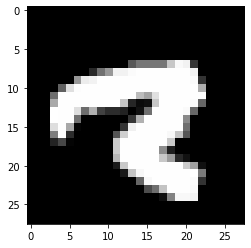

Numero 9 classificato come 4


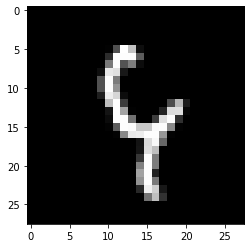

Numero 7 classificato come 3


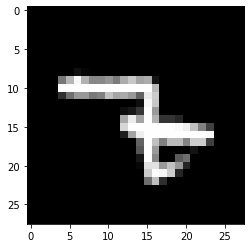

Numero 7 classificato come 8


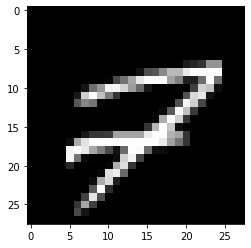

Numero 8 classificato come 2


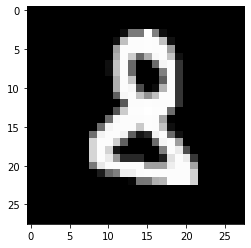

Numero 2 classificato come 0


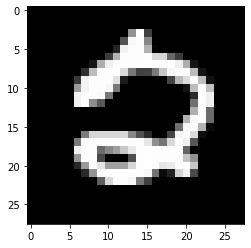

Numero 8 classificato come 9


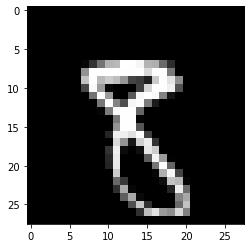

Numero 7 classificato come 2


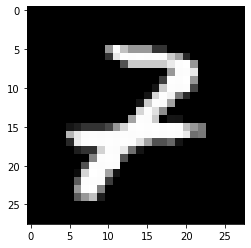

Numero 7 classificato come 9


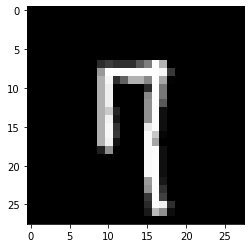

Numero 5 classificato come 3


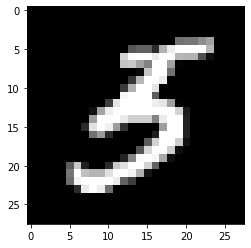

Numero 7 classificato come 9


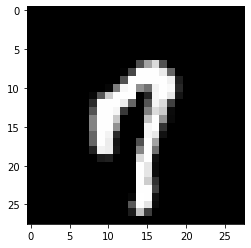

Numero 2 classificato come 0


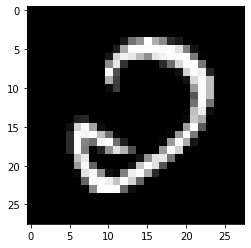

Numero 6 classificato come 4


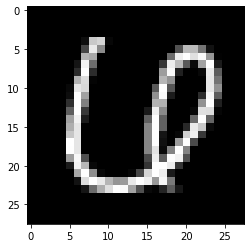

Numero 6 classificato come 1


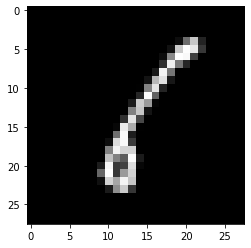

Numero 1 classificato come 2


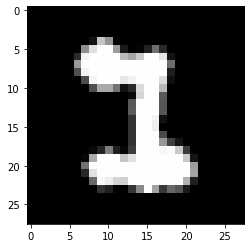

Numero 8 classificato come 0


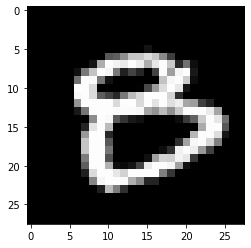

Numero 5 classificato come 3


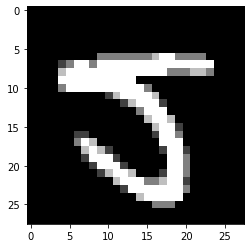

Numero 9 classificato come 1


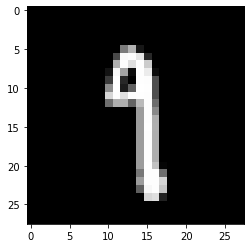

Numero 9 classificato come 4


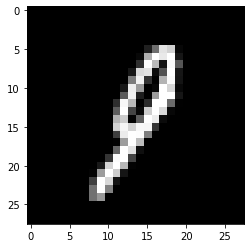

Numero 3 classificato come 9


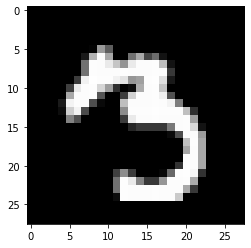

Numero 9 classificato come 4


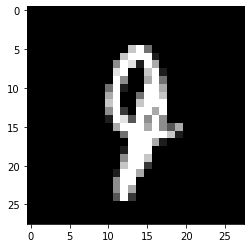

Numero 9 classificato come 4


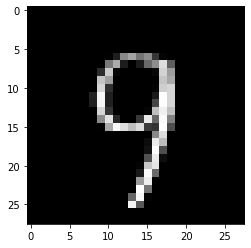

Numero 2 classificato come 0


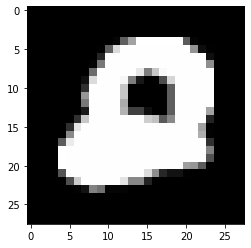

Numero 2 classificato come 4


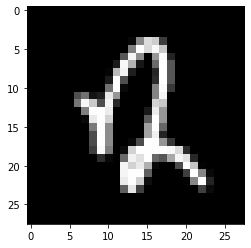

Numero 9 classificato come 3


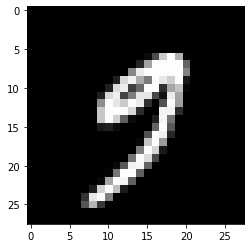

Numero 5 classificato come 3


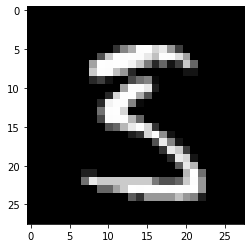

Numero 7 classificato come 1


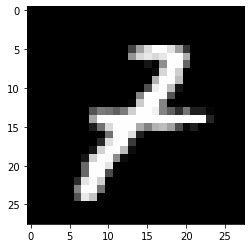

Numero 9 classificato come 5


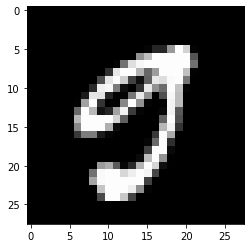

Numero 6 classificato come 1


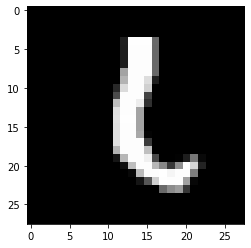

Numero 9 classificato come 4


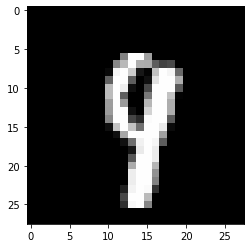

Numero 9 classificato come 4


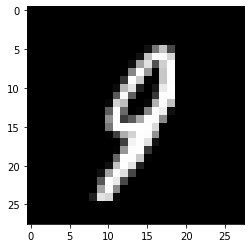

Numero 8 classificato come 2


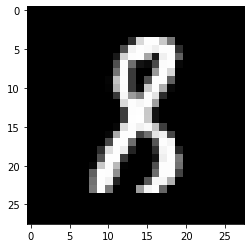

Numero 9 classificato come 4


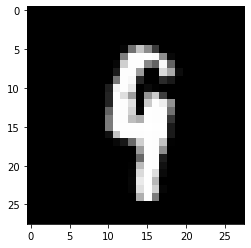

Numero 3 classificato come 2


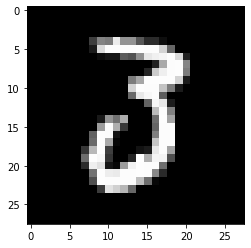

Numero 3 classificato come 2


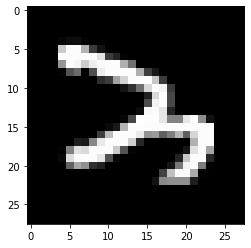

Numero 9 classificato come 5


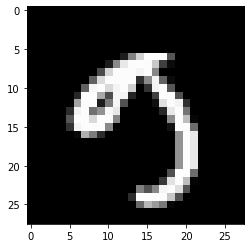

Numero 3 classificato come 5


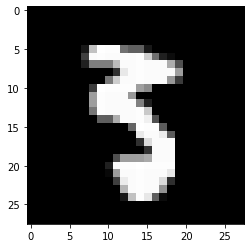

Numero 9 classificato come 4


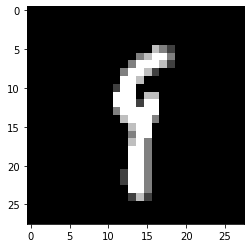

Numero 8 classificato come 3


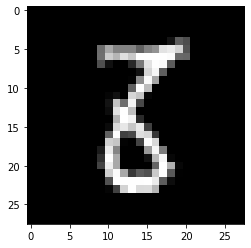

Numero 1 classificato come 2


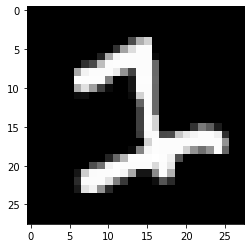

Numero 5 classificato come 9


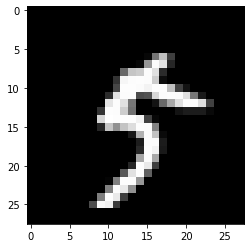

Numero 7 classificato come 9


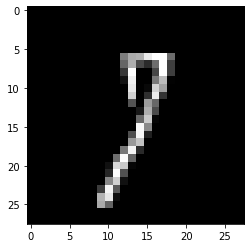

Numero 8 classificato come 9


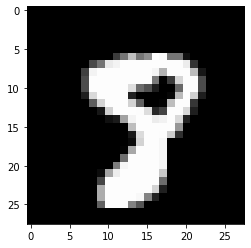

Numero 7 classificato come 9


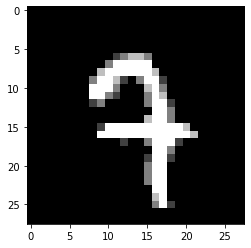

Numero 6 classificato come 0


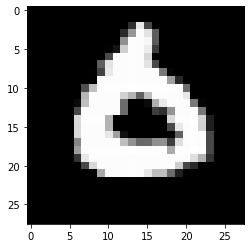

Numero 9 classificato come 1


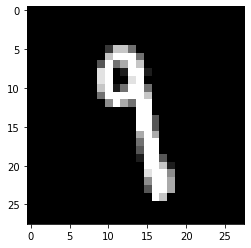

Numero 6 classificato come 4


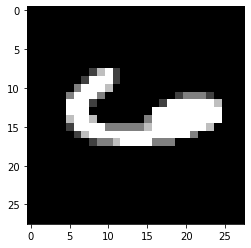

Numero 5 classificato come 0


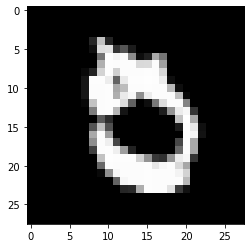

Numero 7 classificato come 1


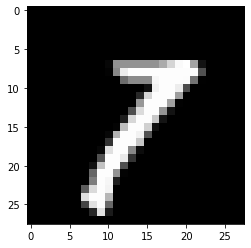

Numero 9 classificato come 3


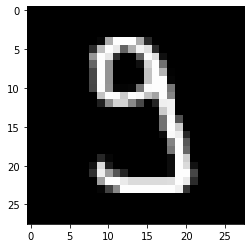

Numero 8 classificato come 0


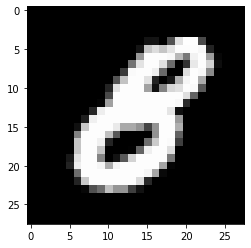

Numero 8 classificato come 4


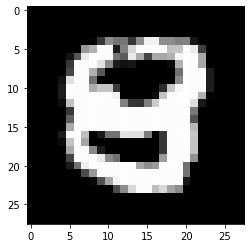

Numero 4 classificato come 6


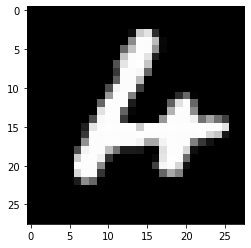

Numero 7 classificato come 8


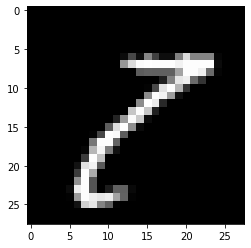

Numero 2 classificato come 0


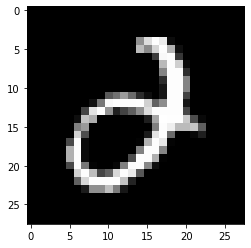

Numero 2 classificato come 4


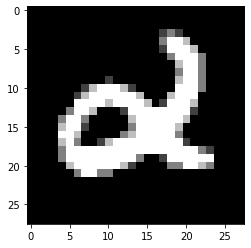

Numero 7 classificato come 4


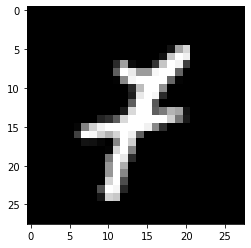

Numero 6 classificato come 5


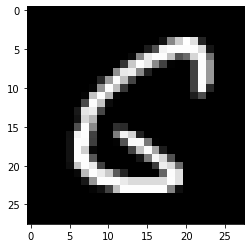

Numero 9 classificato come 4


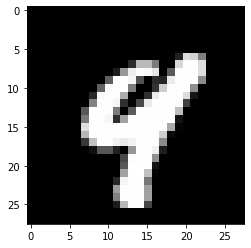

Numero 5 classificato come 3


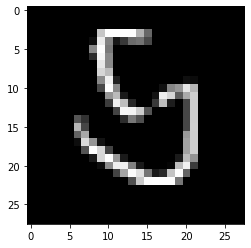

Numero 1 classificato come 3


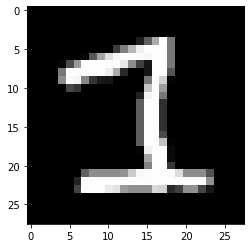

Numero 3 classificato come 5


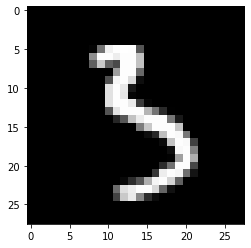

Numero 5 classificato come 3


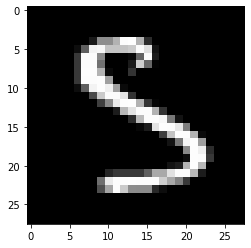

Numero 7 classificato come 1


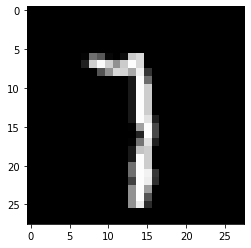

Numero 9 classificato come 4


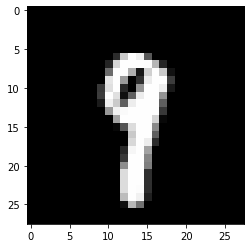

Numero 9 classificato come 4


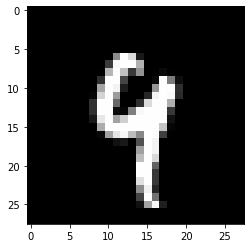

Numero 9 classificato come 8


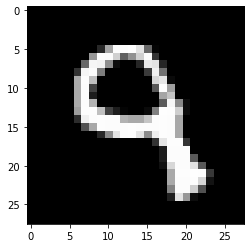

Numero 7 classificato come 4


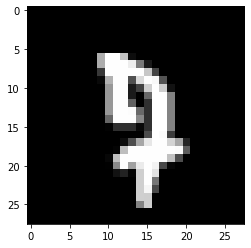

Numero 7 classificato come 1


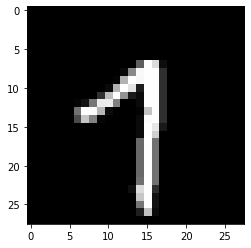

Numero 0 classificato come 9


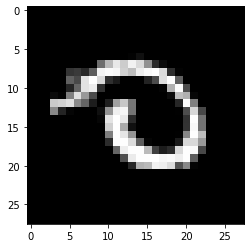

Numero 7 classificato come 9


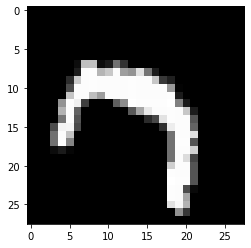

Numero 9 classificato come 0


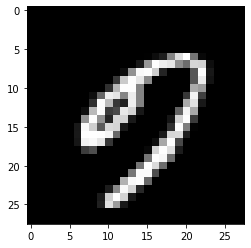

Numero 2 classificato come 8


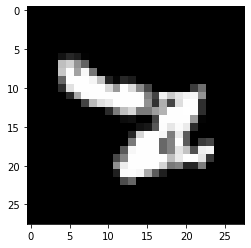

Numero 7 classificato come 9


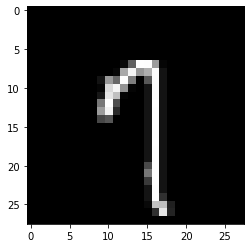

Numero 2 classificato come 8


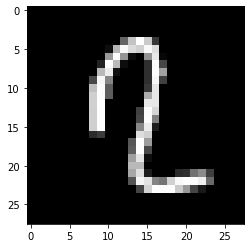

Numero 7 classificato come 1


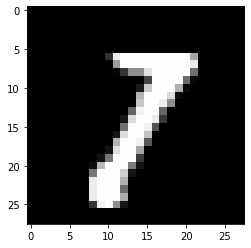

Numero 3 classificato come 9


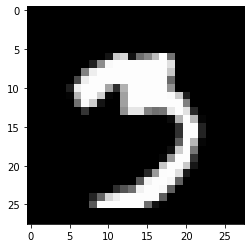

Numero 5 classificato come 3


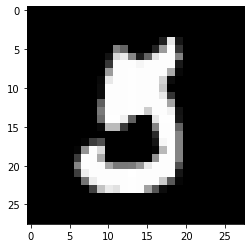

Numero 9 classificato come 4


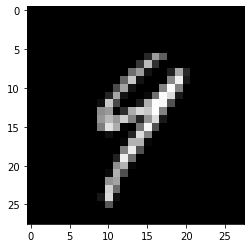

Numero 3 classificato come 2


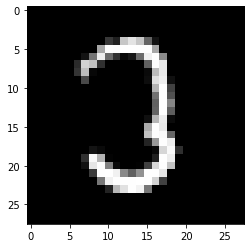

Numero 8 classificato come 3


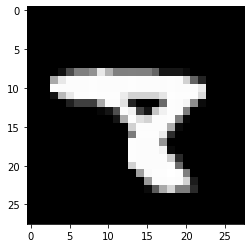

Numero 6 classificato come 5


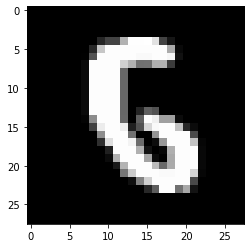

Numero 7 classificato come 4


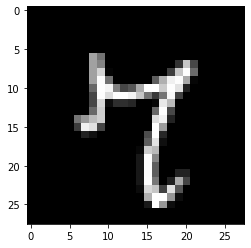

Numero 6 classificato come 8


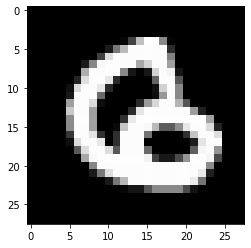

Numero 3 classificato come 5


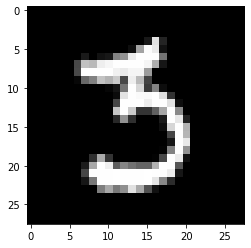

Numero 9 classificato come 4


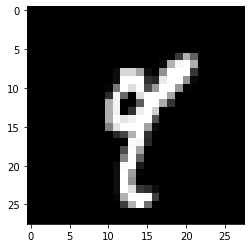

Numero 3 classificato come 5


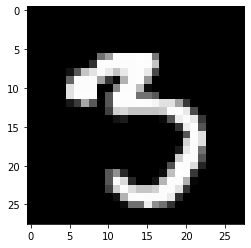

Numero 6 classificato come 0


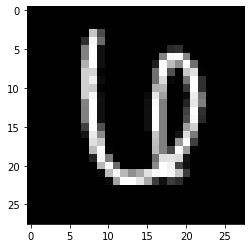

Numero 9 classificato come 4


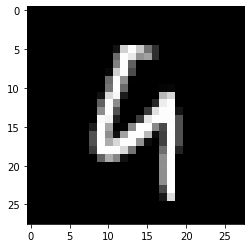

Numero 4 classificato come 9


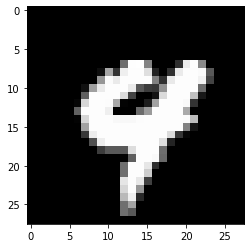

Numero 2 classificato come 4


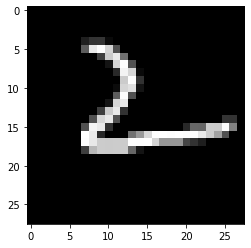

Numero 0 classificato come 8


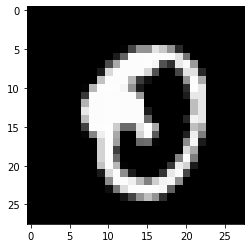

Numero 7 classificato come 1


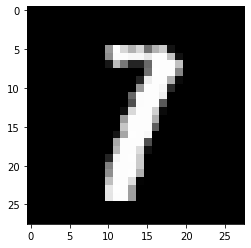

Numero 7 classificato come 1


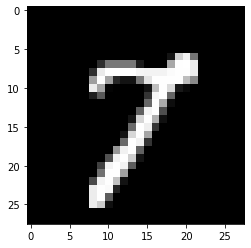

Numero 8 classificato come 4


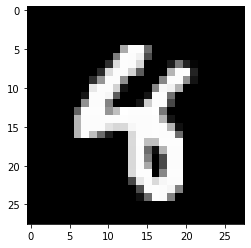

Numero 7 classificato come 4


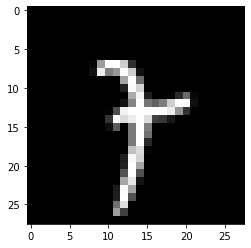

Numero 0 classificato come 5


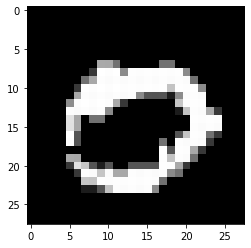

Numero 1 classificato come 8


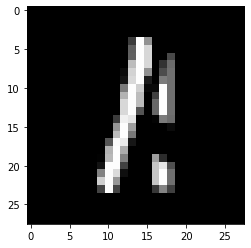

Numero 8 classificato come 0


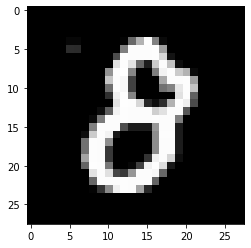

Numero 1 classificato come 8


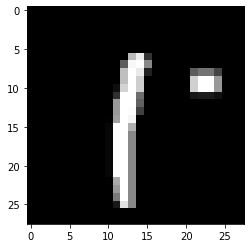

Numero 4 classificato come 2


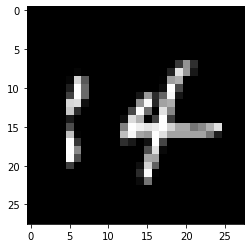

Numero 7 classificato come 1


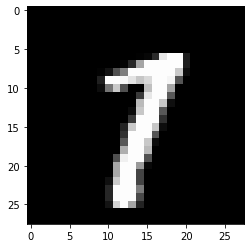

Numero 7 classificato come 0


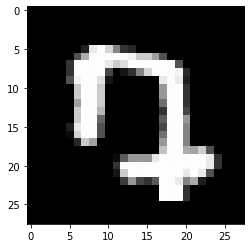

Numero 5 classificato come 3


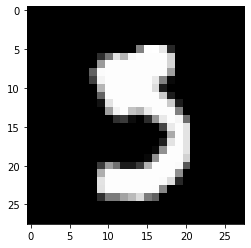

Numero 3 classificato come 9


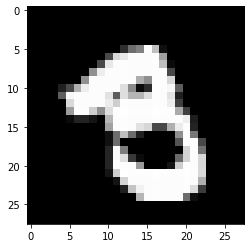

Numero 5 classificato come 3


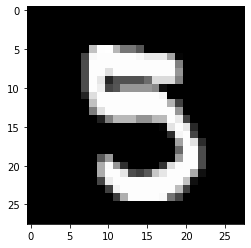

Numero 3 classificato come 8


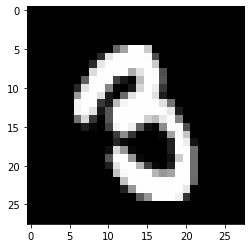

Numero 5 classificato come 3


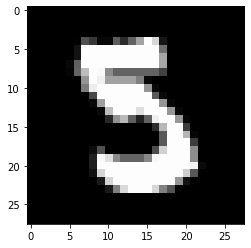

Numero 5 classificato come 9


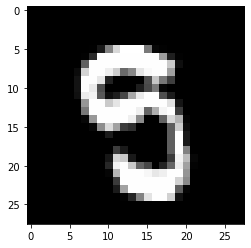

Numero 3 classificato come 9


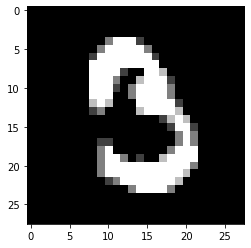

Numero 3 classificato come 9


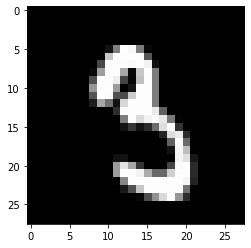

Numero 3 classificato come 9


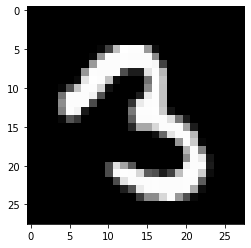

Numero 3 classificato come 9


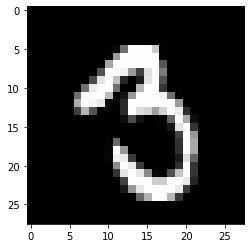

Numero 3 classificato come 2


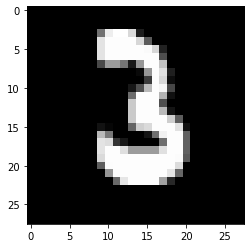

Numero 8 classificato come 9


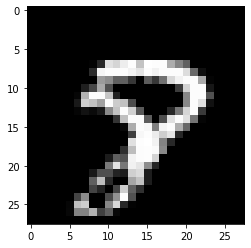

Numero 7 classificato come 1


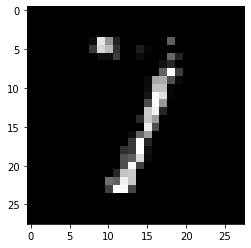

Numero 7 classificato come 1


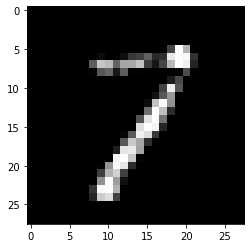

Numero 0 classificato come 9


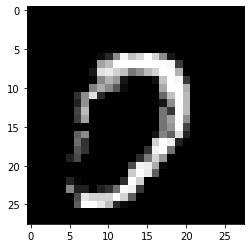

Numero 7 classificato come 9


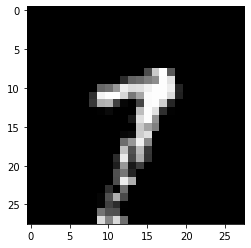

Numero 8 classificato come 4


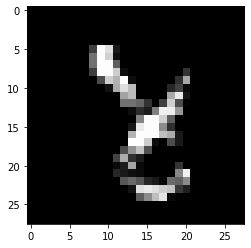

Numero 8 classificato come 9


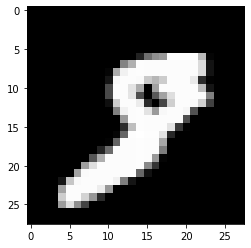

Numero 1 classificato come 6


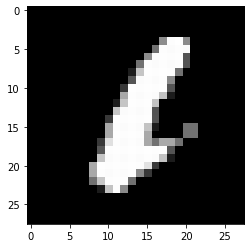

Numero 9 classificato come 4


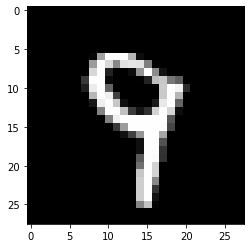

Numero 6 classificato come 4


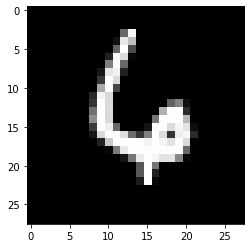

Numero 0 classificato come 3


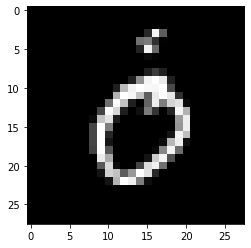

Numero 7 classificato come 4


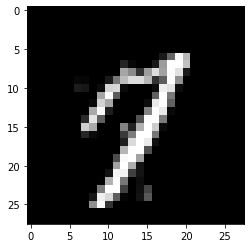

Numero 4 classificato come 8


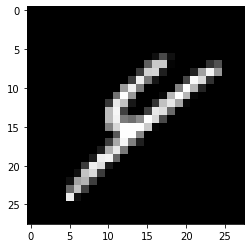

Numero 2 classificato come 4


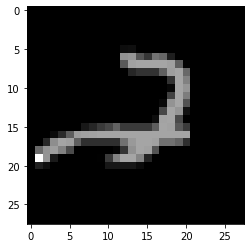

Numero 2 classificato come 4


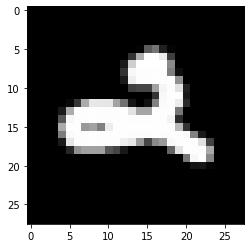

Numero 7 classificato come 9


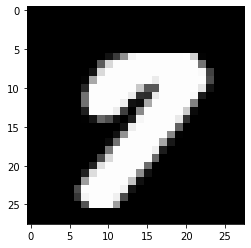

Numero 7 classificato come 1


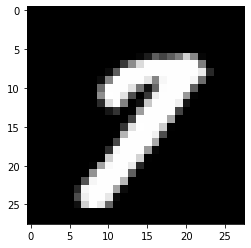

Numero 1 classificato come 0


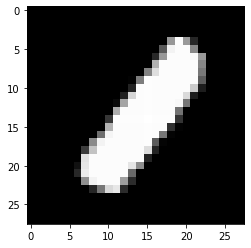

Numero 7 classificato come 9


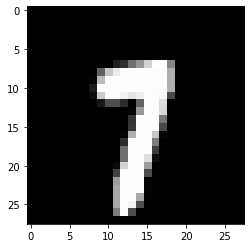

Numero 3 classificato come 9


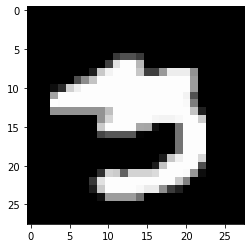

Numero 9 classificato come 4


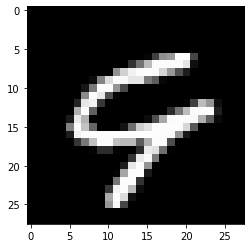

Numero 2 classificato come 4


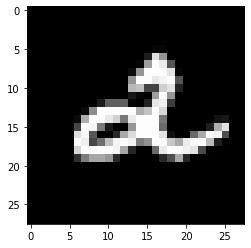

Numero 4 classificato come 9


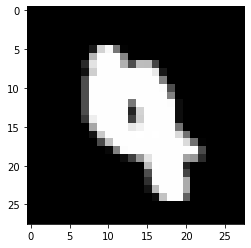

Numero 7 classificato come 2


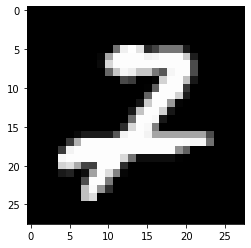

Numero 7 classificato come 2


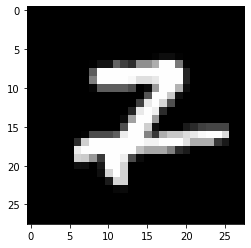

Numero 7 classificato come 2


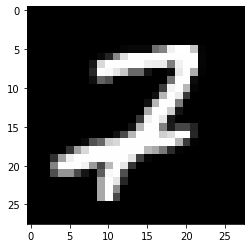

Numero 8 classificato come 9


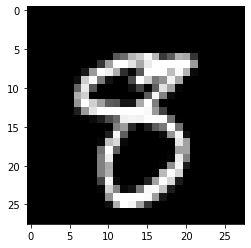

Numero 5 classificato come 3


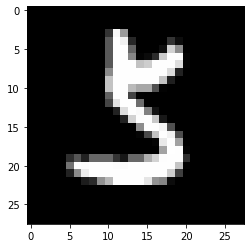

Numero 9 classificato come 4


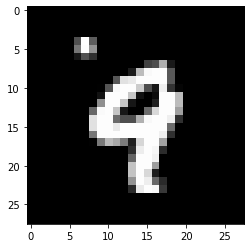

Numero 6 classificato come 3


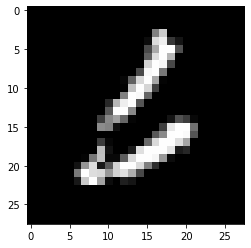

Numero 5 classificato come 6


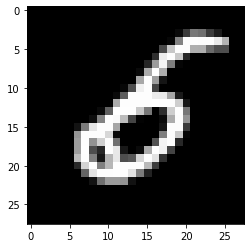

Numero 4 classificato come 0


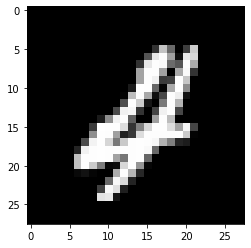

Numero 2 classificato come 0


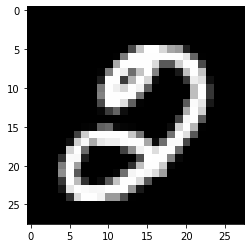

Numero 5 classificato come 0


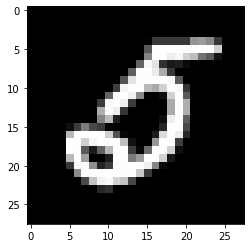

Numero 2 classificato come 0


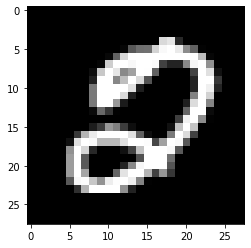

Numero 6 classificato come 5


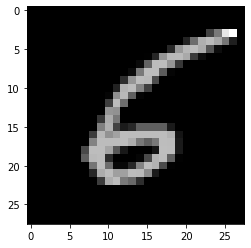

Numero 9 classificato come 4


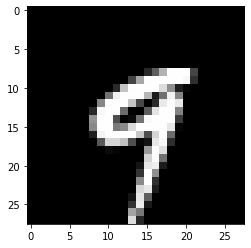

Numero 2 classificato come 7


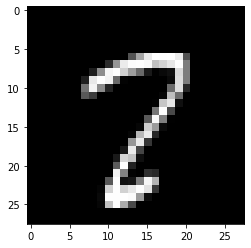

Numero 6 classificato come 8


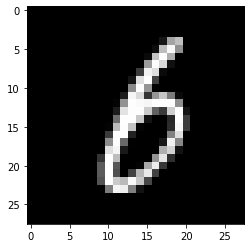

Numero 2 classificato come 8


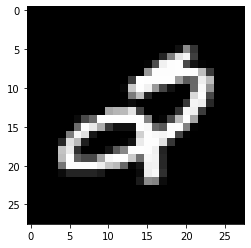

Numero 7 classificato come 9


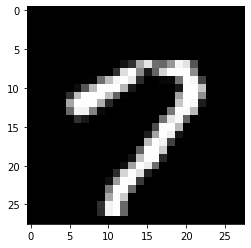

In [9]:
for i in range(0,len(X_test)):
    if(Y_test[i]!=y_pred[i]):
        print("Numero %d classificato come %d" % (Y_test[i], y_pred[i]))
        plt.imshow(X_test[i].reshape([28,28]), cmap="gray")
        plt.show()